<a href="https://colab.research.google.com/github/ddenebb/estructures_Dataframe/blob/main/Tasca_M7_T01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#- Exercise 1

Create at least two different classification models to try to predict the best classes of the attached file.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#images_dir = '/content/gdrive/My Drive/Images'

Mounted at /content/drive


To create classification models for the wine dataset, these general steps can be followed:

    Load the data into a pandas dataframe
    Split the data into training and testing sets
    Preprocess the data (e.g., standardize the features)
    Train the classification models on the training set
    Evaluate the models on the testing set
    Choose the best model based on evaluation metrics (e.g., accuracy, F1-score)

Step 1: load libraries, load data into a pandas dataframe

In [7]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 7/Data/wineData.txt"
import pandas as pd

df = pd.read_csv(path, delimiter=",", names=["class", "alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280_od315_of_diluted_wines", "proline"])

print(df.info(memory_usage='deep'))
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280_od315_of_diluted_wines  178 non-null    float64
 13  proli

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Step 2: Import SkLearn libraries and split the data into training and testing sets

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# Load the data
wine_data = df




Check for missing values in the dataset

In [27]:
print(df.isna().sum())

class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280_od315_of_diluted_wines    0
proline                         0
dtype: int64


In [43]:
# Split the data into training and testing sets
X = wine_data.drop('class', axis=1)
y = wine_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature scaling: Since KNN is a distance-based algorithm, it is important to scale the features to ensure that all features are equally important. Similarly, XGBoost can benefit from feature scaling for better performance. A scaler such as StandardScaler can be used.

In [44]:
# Preprocess the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 4: Import libraries and train the classification models on the training set

In [45]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

# Train XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

Train XGB model select and print features based on their importance scores

In [46]:

# fit an XGBoost model to the training data
xgb_model = xgb
xgb_model.fit(X_train, y_train)

# select features based on their importance scores
selector = SelectFromModel(xgb_model, threshold=0.01, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# print the selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['alcohol', 'malic_acid', 'magnesium', 'total_phenols', 'flavanoids',
       'color_intensity', 'od280_od315_of_diluted_wines', 'proline'],
      dtype='object')


Step 5: Evaluate the XGB model on the testing set





In [47]:
# Evaluate the XGB model on the testing set
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

In [48]:
# Print the accuracy of XGB classifier
print("XGBoost accuracy:", acc_xgb)

XGBoost accuracy: 0.9722222222222222


In [49]:
from sklearn.neighbors import KNeighborsClassifier
# Train KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
# Evaluate the KNNmodel on the testing set
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

In [51]:
# Print the accuracy of KNN classifier
print("KNN accuracy:", acc_knn)

KNN accuracy: 0.9444444444444444


#Exercise 2
Compare the classification models using precision (accuracy), a matrix of confusion and other more advanced metrics.

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate KNN model
knn_acc = knn.score(X_test, y_test)
knn_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)

print("KNN Accuracy:", knn_acc)
print("KNN Confusion Matrix:\n", knn_cm)
print("KNN Classification Report:\n", knn_report)

# Evaluate XGBoost model
xgb_acc = xgb.score(X_test, y_test)
xgb_pred = xgb.predict(X_test)
xgb_cm = confusion_matrix(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)

print("XGBoost Accuracy:", xgb_acc)
print("XGBoost Confusion Matrix:\n", xgb_cm)
print("XGBoost Classification Report:\n", xgb_report)


KNN Accuracy: 0.9444444444444444
KNN Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
KNN Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

XGBoost Accuracy: 0.9722222222222222
XGBoost Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  1  7]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      1.00      0.97        14
           3       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      

#Exercise 3

Train them using the different parameters that they allow in order to improve the prediction.

- Exercise 3

Train them using the different parameters that they allow in order to improve the prediction.

KNN with different values of k:

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Set the parameter grid for k values
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# Train the KNN model with cross-validation
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

# Print the best k value and accuracy score
print("KNN Best Parameters:", grid.best_params_)
print("KNN Best Accuracy:", grid.best_score_)


KNN Best Parameters: {'n_neighbors': 6}
KNN Best Accuracy: 0.9647619047619047


XGBoost with different parameters:

In [56]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Set the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 1, 2, 3, 4, 5],
    'min_child_weight': [1, 3, 5, 7],
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

# Train the XGBoost model with cross-validation
xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=3)
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=100, cv=10, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters and accuracy score
print("XGBoost Best Parameters:", random_search.best_params_)
print("XGBoost Best Accuracy:", random_search.best_score_)


XGBoost Best Parameters: {'subsample': 0.9, 'n_estimators': 1000, 'min_child_weight': 7, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.7}
XGBoost Best Accuracy: 0.9785714285714286


#Exercise 4

Compare their performance to serve the train/test or cross-validation approximation.

 Cross_val_score() function from scikit-learn will be used to perform 5-fold cross-validation on both the KNN and XGBoost models. The scoring parameter is set to "accuracy" to evaluate the models based on their accuracy scores. The function returns an array of accuracy scores for each fold, which we can use to compute the mean and standard deviation of the accuracy scores. This gives us an estimate of the model's performance on unseen data.



In [57]:
from sklearn.model_selection import cross_val_score

# Evaluate KNN model using cross-validation
knn_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("KNN Cross-validation Accuracy: {:.2f} (+/- {:.2f})".format(knn_scores.mean(), knn_scores.std() * 2))

# Evaluate XGBoost model using cross-validation
xgb_scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')
print("XGBoost Cross-validation Accuracy: {:.2f} (+/- {:.2f})".format(xgb_scores.mean(), xgb_scores.std() * 2))


KNN Cross-validation Accuracy: 0.69 (+/- 0.10)
XGBoost Cross-validation Accuracy: 0.96 (+/- 0.06)


#Exercise 5

Apply some engineering process to improve the results (normalization, standardization, sampling...)

Check models for overfitting, underfitting, class imbalance and high variance:

In [60]:
from sklearn.metrics import accuracy_score

# Fit the model on training data
knn.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate accuracy score for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

if train_accuracy > test_accuracy:
    print("Warning: knn model may be overfitting")

# Fit the model on training data
xgb.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate accuracy score for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

if train_accuracy > test_accuracy:
    print("Warning: xgb model may be overfitting")


In [62]:
from sklearn.metrics import accuracy_score

# Fit the model on training data
knn.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate accuracy score for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

if train_accuracy < test_accuracy:
    print("Warning: knn may be underfitting")

In [63]:
from sklearn.metrics import accuracy_score

# Fit the model on training data
xgb.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate accuracy score for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

if train_accuracy < test_accuracy:
    print("Warning: xgb may be underfitting")

Check for class imbalance:

In [64]:
from sklearn.metrics import confusion_matrix

# Fit the model on training data
knn.fit(X_train, y_train)

# Predict on test data
y_test_pred = knn.predict(X_test)

# Calculate confusion matrix for test data
cm = confusion_matrix(y_test, y_test_pred)

if cm[0][1] > 0 or cm[0][2] > 0 or cm[1][0] > 0 or cm[1][2] > 0 or cm[2][0] > 0 or cm[2][1] > 0:
    print("Warning: class imbalance may be affecting knn model performance")


In [65]:
from sklearn.metrics import confusion_matrix

# Fit the model on training data
xgb.fit(X_train, y_train)

# Predict on test data
y_test_pred = knn.predict(X_test)

# Calculate confusion matrix for test data
cm = confusion_matrix(y_test, y_test_pred)

if cm[0][1] > 0 or cm[0][2] > 0 or cm[1][0] > 0 or cm[1][2] > 0 or cm[2][0] > 0 or cm[2][1] > 0:
    print("Warning: class imbalance may be affecting xgb model performance")


Check for high variance:

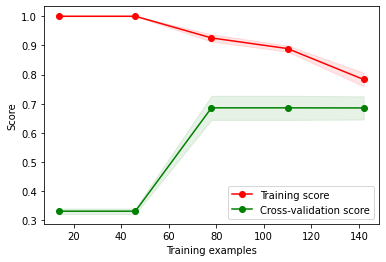

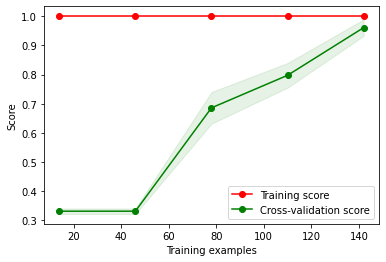

In [67]:
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()

# Plot learning curves for knn model
plot_learning_curve(knn, X, y)

if knn.score(X_train, y_train) - knn.score(X_test, y_test) > 0.1:
    print("Warning: model may have high variance")

# Plot learning curves for xgb model
plot_learning_curve(xgb, X, y)

if knn.score(X_train, y_train) - knn.score(X_test, y_test) > 0.1:
    print("Warning: xgb model may have high variance")

Regularization can be used to deal with overfitting for the KNN model:



In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

# Create pipeline with StandardScaler and KNN classifier
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Define hyperparameters for KNN classifier and regularization parameter for StandardScaler
param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
              'kneighborsclassifier__weights': ['uniform', 'distance'],
              'standardscaler__with_mean': [True, False],
              'standardscaler__with_std': [True, False],
              'standardscaler__copy': [True, False]}

# Use GridSearchCV to find the best hyperparameters
knn_grid = GridSearchCV(knn_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best hyperparameters for KNN:", knn_grid.best_params_)
print("KNN Accuracy:", knn_grid.best_score_)


Best hyperparameters for KNN: {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'uniform', 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True}
KNN Accuracy: 0.9578817733990148


Regularization can be used to deal with overfitting for the KNN model:




In [ ]:
# Define XGBoost classifier
xgb_clf = xgb

# Define hyperparameters for XGBoost classifier
param_grid = {'max_depth': [3, 5, 7, 9],
              'learning_rate': [0.01, 0.1, 0.3],
              'n_estimators': [50, 100, 150],
              'gamma': [0, 0.1, 0.5, 1],
              'subsample': [0.5, 0.75, 1],
              'colsample_bytree': [0.5, 0.75, 1],
              'reg_alpha': [0, 0.1, 1],
              'reg_lambda': [0, 0.1, 1]}

# Use GridSearchCV to find the best hyperparameters
xgb_grid = GridSearchCV(xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best hyperparameters for XGBoost:", xgb_grid.best_params_)
print("XGBoost Accuracy:", xgb_grid.best_score_)
